### **Лабораторная Работа №1**

#### **Шаг 0. Подготовка среды и ввод исходных данных**

Первым шагом является подготовка рабочего пространства, то есть импорт необходимых библиотек для численных расчетов (`NumPy`), работы с таблицами (`Pandas`), визуализации (`Matplotlib`) и статистических вычислений (`SciPy`). Сразу после этого мы вводим в программу нашу исходную выборку данных из Варианта 5.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Улучшение визуального стиля графиков
plt.style.use('seaborn-v0_8-whitegrid')

data = np.array([
    31, 7, 2, 11, 13, 8, 11, 3, 2, 26,
    1, 2, 6, 2, 7, 16, 42, 16, 12, 32,
    4, 2, 6, 9, 3, 9, 13, 35, 16, 5,
    2, 7, 3, 11, 19, 6, 4, 30, 2, 2,
    3, 5, 4, 21, 4, 7, 1, 6, 2, 39
])

n = len(data)
print("--- Исходные данные ---")
print(data)
print(f"Объем выборки n = {n}")

--- Исходные данные ---
[31  7  2 11 13  8 11  3  2 26  1  2  6  2  7 16 42 16 12 32  4  2  6  9
  3  9 13 35 16  5  2  7  3 11 19  6  4 30  2  2  3  5  4 21  4  7  1  6
  2 39]
Объем выборки n = 50


#### **Шаг 1. Формирование вариационного ряда**

Первичная обработка начинается с упорядочивания данных. **Вариационный ряд** — это расположение исходных значений выборки в порядке возрастания (от `x_min` до `x_max`). Это позволяет наглядно оценить разброс данных и подготовить их к группировке.

In [ ]:
variational_series = np.sort(data)
print("--- Вариационный ряд ---")
print(variational_series)

--- Вариационный ряд ---
[ 1  1  2  2  2  2  2  2  2  2  2  3  3  3  3  4  4  4  4  5  5  6  6  6
  6  7  7  7  7  8  9  9 11 11 11 12 13 13 16 16 16 19 21 26 30 31 32 35
 39 42]


#### **Шаг 2. Группировка данных**

Для анализа структуры данных их разбивают на интервалы. Сначала вычисляются базовые параметры: размах `R`, количество интервалов `k` (по формуле Стерджесса) и ширина интервала `Δx`. Для удобства расчетов ширина интервала округляется до целого значения.

In [ ]:
x_min = variational_series.min()
x_max = variational_series.max()
R = x_max - x_min

# Количество интервалов по формуле Стерджесса
k = round(1 + 3.322 * np.log10(n))

# Ширина интервала
dx = R / k
# Округление
dx_rounded = np.ceil(dx)

print(f"Минимальное значение x_min = {x_min}")
print(f"Максимальное значение x_max = {x_max}")
print(f"Размах варьирования R = {R}")
print(f"Число интервалов (по Стерджессу) k ≈ {1 + 3.322 * np.log10(n):.2f}, принимаем k = {k}")
print(f"Ширина интервала dx = {R}/{k} ≈ {dx:.2f}, принимаем dx = {dx_rounded}")

Минимальное значение x_min = 1
Максимальное значение x_max = 42
Размах варьирования R = 41
Число интервалов (по Стерджессу) k ≈ 6.64, принимаем k = 7
Ширина интервала dx = 41/7 ≈ 5.86, принимаем dx = 6.0


#### **Шаг 3. Построение статистического ряда**

На основе вычисленных параметров мы строим **статистический ряд** — основную таблицу для анализа. В ней для каждого интервала подсчитываются: частота `nⱼ` (сколько значений попало в интервал), относительная частота `pⱼ`, накопленные частоты и плотность относительной частоты `fⱼ`, которая используется для построения гистограммы.

In [ ]:
# Интервалы
bins = np.arange(x_min, x_max + dx_rounded, dx_rounded)
# Частоты
frequencies, bin_edges = np.histogram(data, bins=bins)

# DataFrame для красивого вывода
df_stats = pd.DataFrame()
df_stats['Границы интервалов'] = [f"[{int(bin_edges[i])}; {int(bin_edges[i+1])})" for i in range(len(bin_edges)-1)]
df_stats['Середины интервалов'] = (bin_edges[:-1] + bin_edges[1:]) / 2
df_stats['Частоты (n_j)'] = frequencies
df_stats['Отн. частоты (p_j)'] = frequencies / n
df_stats['Накопл. частоты'] = frequencies.cumsum()
df_stats['Накопл. отн. частоты (F_j)'] = df_stats['Отн. частоты (p_j)'].cumsum()
df_stats['Плотность отн. частоты (f_j)'] = df_stats['Отн. частоты (p_j)'] / dx_rounded

print("--- Статистический ряд распределения ---")
print(df_stats.to_string())

--- Статистический ряд распределения ---
  Границы интервалов  Середины интервалов  Частоты (n_j)  Отн. частоты (p_j)  Накопл. частоты  Накопл. отн. частоты (F_j)  Плотность отн. частоты (f_j)
0             [1; 7)                  4.0             25                0.50               25                        0.50                      0.083333
1            [7; 13)                 10.0             11                0.22               36                        0.72                      0.036667
2           [13; 19)                 16.0              5                0.10               41                        0.82                      0.016667
3           [19; 25)                 22.0              2                0.04               43                        0.86                      0.006667
4           [25; 31)                 28.0              2                0.04               45                        0.90                      0.006667
5           [31; 37)                 34.0      

*(Примечание: последняя граница интервала включается в `histogram`, поэтому в отчете ее напишем как `[36; 43]`).*

#### **Шаг 4. Визуальный анализ распределения**

Графики — лучший способ понять характер данных. Мы строим два основных:
1.  **Гистограмма** — столбчатая диаграмма, показывающая распределение частот по интервалам. Ее форма позволяет визуально оценить закон распределения.
2.  **Кумулята** — график накопленной относительной частоты. Показывает, какая доля выборки имеет значение меньше заданного.

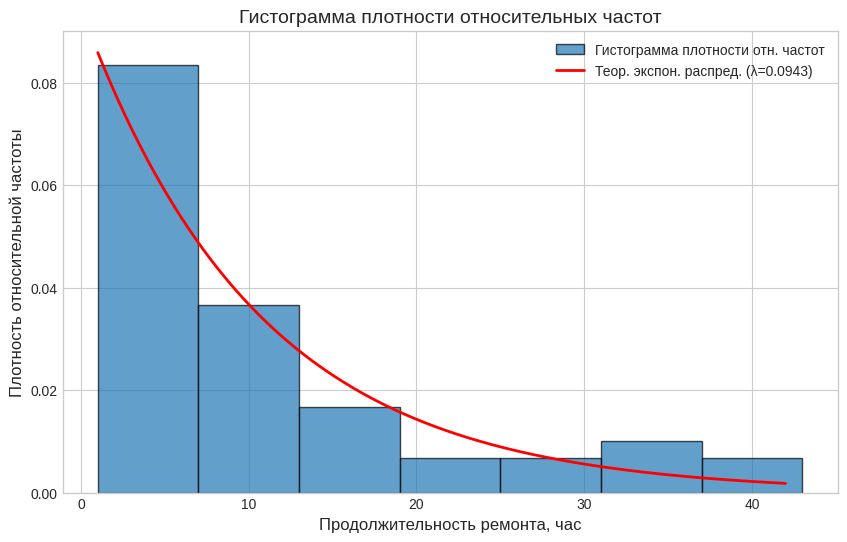

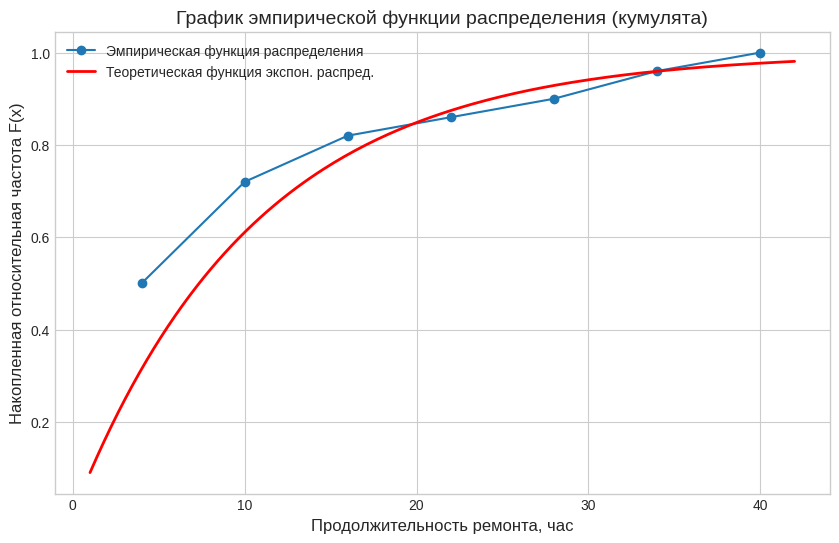

In [ ]:
# Гистограмма
plt.figure(figsize=(10, 6))
weights = np.ones_like(data) / (len(data) * dx_rounded) # Нормировка для плотности
plt.hist(data, bins=bins, weights=weights, edgecolor='black', alpha=0.7, label='Гистограмма плотности отн. частот')

# Теоретическая кривая для наглядности
lambda_param = 1 / data.mean()
x_theoretical = np.linspace(x_min, x_max, 200)
y_theoretical = lambda_param * np.exp(-lambda_param * x_theoretical)
plt.plot(x_theoretical, y_theoretical, 'r-', linewidth=2, label=f'Теор. экспон. распред. (λ={lambda_param:.4f})')

plt.title('Гистограмма плотности относительных частот', fontsize=14)
plt.xlabel('Продолжительность ремонта, час', fontsize=12)
plt.ylabel('Плотность относительной частоты', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Кумулята
plt.figure(figsize=(10, 6))
# Эмпирическая функция
plt.plot(df_stats['Середины интервалов'], df_stats['Накопл. отн. частоты (F_j)'], 'o-', label='Эмпирическая функция распределения')
# Теоретическая функция
cdf_theoretical = 1 - np.exp(-lambda_param * x_theoretical)
plt.plot(x_theoretical, cdf_theoretical, 'r-', linewidth=2, label='Теоретическая функция экспон. распред.')

plt.title('График эмпирической функции распределения (кумулята)', fontsize=14)
plt.xlabel('Продолжительность ремонта, час', fontsize=12)
plt.ylabel('Накопленная относительная частота F(x)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### **Шаг 5. Расчет числовых характеристик**

Визуальные оценки подкрепляются точными расчетами. Мы вычисляем основные статистические показатели: среднее (математическое ожидание), дисперсию, асимметрию, эксцесс и **коэффициент вариации**, который является ключевым для выбора теоретического закона.

In [ ]:
# --- Расчет числовых характеристик ---
mean_val = np.mean(data)
variance_val = np.var(data, ddof=1) # ddof=1 для несмещенной оценки
std_dev_val = np.std(data, ddof=1)
skewness_val = stats.skew(data)
kurtosis_val = stats.kurtosis(data)
variation_coeff_val = std_dev_val / mean_val

# Мода
modal_interval_index = df_stats['Частоты (n_j)'].idxmax()
n_m = df_stats.loc[modal_interval_index, 'Частоты (n_j)']
n_m_minus_1 = df_stats.loc[modal_interval_index - 1, 'Частоты (n_j)'] if modal_interval_index > 0 else 0
n_m_plus_1 = df_stats.loc[modal_interval_index + 1, 'Частоты (n_j)'] if modal_interval_index < len(df_stats) - 1 else 0
x0_m = bin_edges[modal_interval_index]
mode_val_grouped = x0_m + dx_rounded * (n_m - n_m_minus_1) / (2 * n_m - n_m_minus_1 - n_m_plus_1)

# Медиана
median_interval_index = df_stats[df_stats['Накопл. частоты'] >= n/2].index[0]
n_me = df_stats.loc[median_interval_index, 'Частоты (n_j)']
sum_n_me_minus_1 = df_stats.loc[median_interval_index - 1, 'Накопл. частоты'] if median_interval_index > 0 else 0
x0_me = bin_edges[median_interval_index]
median_val_grouped = x0_me + dx_rounded * (0.5 * n - sum_n_me_minus_1) / n_me

print("--- Числовые характеристики ---")
print(f"Математическое ожидание: {mean_val:.2f}")
print(f"Дисперсия (несмещенная): {variance_val:.2f}")
print(f"Среднеквадратическое отклонение: {std_dev_val:.2f}")
print(f"Коэффициент асимметрии: {skewness_val:.2f}")
print(f"Эксцесс: {kurtosis_val:.2f}")
print(f"Коэффициент вариации: {variation_coeff_val:.2f}")
print(f"Мода (групп.): {mode_val_grouped:.2f}")
print(f"Медиана (групп.): {median_val_grouped:.2f}")

--- Числовые характеристики ---
Математическое ожидание: 10.60
Дисперсия (несмещенная): 114.73
Среднеквадратическое отклонение: 10.71
Коэффициент асимметрии: 1.48
Эксцесс: 1.22
Коэффициент вариации: 1.01
Мода (групп.): 4.85
Медиана (групп.): 7.00


#### **Шаг 6. Проверка гипотезы о виде распределения**

На основе всех предыдущих шагов мы выдвигаем **нулевую гипотезу H₀** (что наши данные подчиняются экспоненциальному закону). Затем мы проверяем ее с помощью **критерия согласия Пирсона (χ²)**. Мы вычисляем теоретические частоты, которые были бы, если бы закон был идеальным экспоненциальным. Далее объединяем интервалы с малой теоретической частотой (меньше 5) и считаем наблюдаемое значение `χ²_набл`. Сравнив его с критическим значением из таблицы, мы делаем вывод о принятии или отклонении гипотезы.

In [ ]:
# --- Проверка гипотезы по критерию Пирсона (χ²) ---
alpha = 0.05  # Уровень значимости

# Теоретические вероятности для экспоненциального распределения
# CDF(x) = 1 - exp(-lambda*x)
exp_cdf = lambda x, l: 1 - np.exp(-l * x)
theoretical_probs = []
for i in range(len(bin_edges) - 1):
    prob = exp_cdf(bin_edges[i+1], lambda_param) - exp_cdf(bin_edges[i], lambda_param)
    theoretical_probs.append(prob)

theoretical_freqs = np.array(theoretical_probs) * n

# Таблица для расчета
df_chi2 = pd.DataFrame({
    'Границы': df_stats['Границы интервалов'],
    'n_j': df_stats['Частоты (n_j)'],
    'n_j_theor': theoretical_freqs
})

# --- Объединение интервалов с n_j_theor < 5 ---
i = len(df_chi2) - 1
while i > 0:
    if df_chi2.loc[i, 'n_j_theor'] < 5:
        # Объединение текущей строки с предыдущей
        df_chi2.loc[i-1, 'n_j'] += df_chi2.loc[i, 'n_j']
        df_chi2.loc[i-1, 'n_j_theor'] += df_chi2.loc[i, 'n_j_theor']
        # Обновление границы
        new_boundary = f"[{df_chi2.loc[i-1, 'Границы'].split(';')[0][1:]}; {df_chi2.loc[i, 'Границы'].split(';')[1][:-1]})"
        df_chi2.loc[i-1, 'Границы'] = new_boundary
        # Удаление текущей строки
        df_chi2 = df_chi2.drop(i)
    i -= 1
# Сброс индексов после удаления строк
df_chi2 = df_chi2.reset_index(drop=True)

df_chi2['(n-n\')^2/n\''] = (df_chi2['n_j'] - df_chi2['n_j_theor'])**2 / df_chi2['n_j_theor']

print("--- Расчет критерия Пирсона (χ²) ---")
print(df_chi2.to_string())
print("\n")

# Расчет наблюдаемого и критического значений
chi2_observed = df_chi2['(n-n\')^2/n\''].sum()
k_prime = len(df_chi2) # Число интервалов после объединения
m = 1 # Число оцененных параметров (lambda)
df = k_prime - m - 1 # Число степеней свободы
chi2_critical = stats.chi2.ppf(1 - alpha, df)

print("--- Результаты проверки гипотезы ---")
print(f"Наблюдаемое значение хи-квадрат = {chi2_observed:.2f}")
print(f"Число степеней свободы r = {k_prime} - {m} - 1 = {df}")
print(f"Критическое значение хи-квадрат = {chi2_critical:.2f}")

# Вывод
if chi2_observed < chi2_critical:
    print(f"Вывод: Так как {chi2_observed:.2f} < {chi2_critical:.2f}, нулевая гипотеза H₀ не отвергается.")
    print("Эмпирическое распределение согласуется с теоретическим экспоненциальным законом.")
else:
    print(f"Вывод: Так как {chi2_observed:.2f} >= {chi2_critical:.2f}, нулевая гипотеза H₀ отвергается.")
    print("Эмпирическое распределение НЕ согласуется с теоретическим экспоненциальным законом.")

--- Расчет критерия Пирсона (χ²) ---
       Границы  n_j  n_j_theor  (n-n')^2/n'
0       [1; 7)   25  19.665866     1.446821
1      [7; 13)   11  11.165702     0.002459
2     [13; 19)    5   6.339558     0.283050
3  [19;    43)    9   7.462172     0.316920


--- Результаты проверки гипотезы ---
Наблюдаемое значение хи-квадрат = 2.05
Число степеней свободы r = 4 - 1 - 1 = 2
Критическое значение хи-квадрат = 5.99
Вывод: Так как 2.05 < 5.99, нулевая гипотеза H₀ не отвергается.
Эмпирическое распределение согласуется с теоретическим экспоненциальным законом.
